In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 5)

In [4]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### There is no missing Value

In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Name: count, Length: 147, dtype: int64

In [9]:
data["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

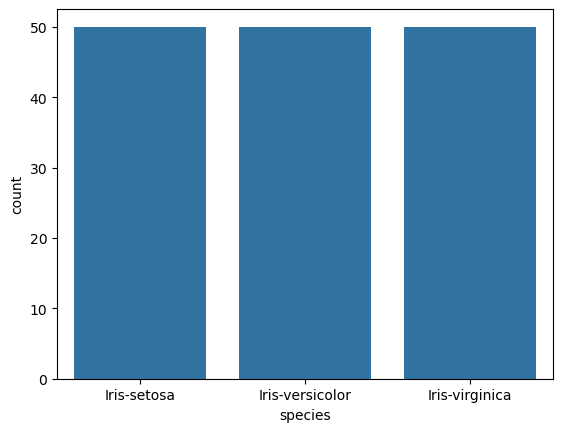

In [10]:
sns.countplot(x = 'species', data = data )


<Axes: title={'center': 'species count'}, ylabel='species'>

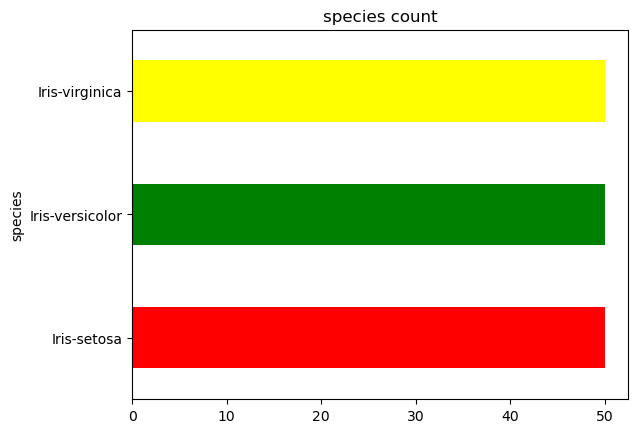

In [12]:
data['species'].value_counts().plot(kind='barh', color=['red','green','yellow'], title='species count')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

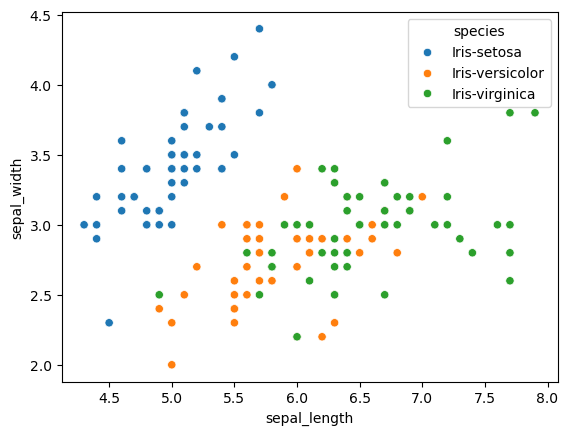

In [13]:
sns.scatterplot(x ='sepal_length', y = 'sepal_width', hue ='species', data = data)

In [14]:
data.replace({'species':{'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}, inplace = True)

In [15]:
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [16]:
from sklearn.model_selection import train_test_split
x = data.drop(columns='species', axis= 1 )
y = data['species']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=4)

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [18]:
LR.fit(x_train,y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
y_pred = LR.predict(x_test)
acc_LR = accuracy_score(y_pred, y_test)
print(acc_LR)

0.9736842105263158


In [20]:
from sklearn import metrics
score = round(LR.score(x_test, y_test)*100,2)
cls_report = classification_report(y_pred, y_test)
print('accuracy score for the logistic regression model is:', score)
print('classification report for our model is:', cls_report)


accuracy score for the logistic regression model is: 97.37
classification report for our model is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.96      0.97      0.96        38
weighted avg       0.98      0.97      0.97        38



In [22]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
acc_svc = accuracy_score(y_pred_svc,y_test)
score_svc = round(svc.score(x_test, y_test)*100,2)
cls_svc = classification_report(y_pred_svc, y_test)
print('accuracy score of svc model is :', acc_svc)
print('classification report of svc model is:')
print(cls_svc)

accuracy score of svc model is : 0.9736842105263158
classification report of svc model is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.96      0.97      0.96        38
weighted avg       0.98      0.97      0.97        38



In [23]:
LR.predict([[6.7, 3.0, 5.2, 2.3]])

array([2], dtype=int64)

In [24]:
svc.predict([[6.7, 3.0, 5.2, 2.3]])

array([2], dtype=int64)

In [26]:
import pickle

with open('svc_model.pkl', 'wb') as file:
    pickle.dump(svc, file)
